<a href="https://colab.research.google.com/github/Vyasbabbadi/Diabetics-/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [179]:
df=pd.read_csv('/content/diabetes - diabetes.csv')

In [180]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,@
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN


In [181]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,@
763,10,101,76,48,180,32.9,0.171,63,0,NaN
764,2,122,70,27,0,36.8,0.340,27,0,NaN
765,5,121,72,23,112,26.2,0.245,30,0,NaN
766,1,126,60,0,0,30.1,0.349,47,1,NaN
767,1,93,70,31,0,30.4,0.315,23,0,NaN


In [182]:
df.shape

(768, 10)

In [183]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
@                           768
dtype: int64

In [184]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

**Data Visualization**

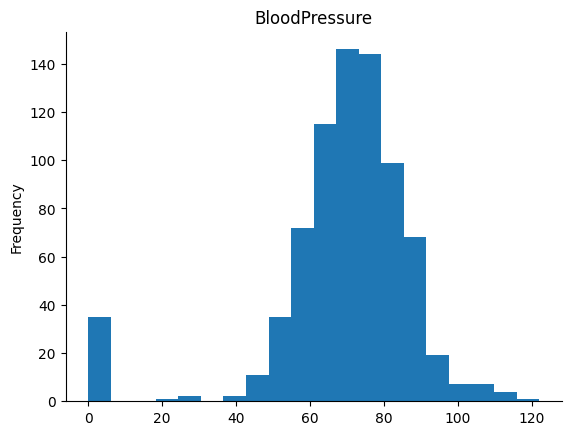

In [185]:
df['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

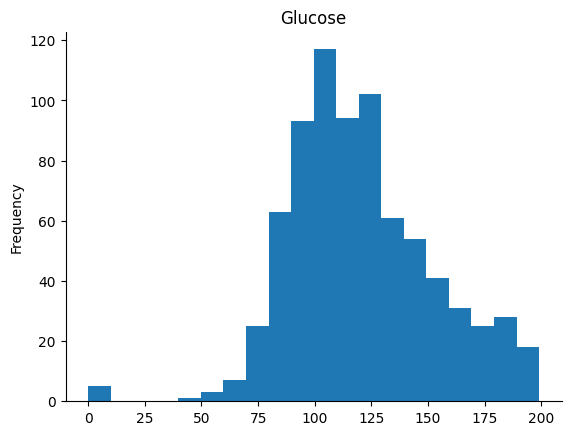

In [186]:
df['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

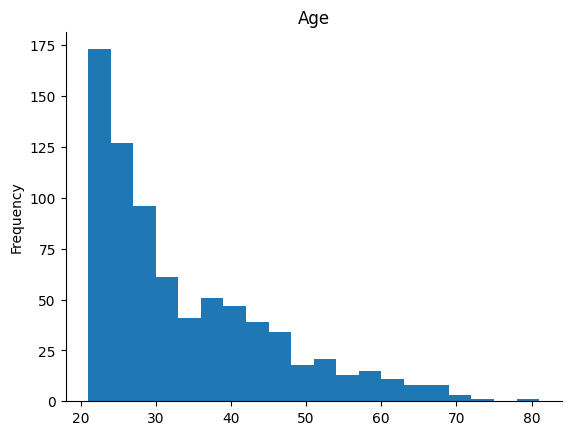

In [187]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Train Logistic Regression Model**

In [188]:
model1 = LogisticRegression(C=0.5)

In [189]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

scale = StandardScaler()
x_scaled = scale.fit_transform(x_imputed)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

model1 = LogisticRegression(C=0.5)
model1.fit(x_train, y_train)

LogisticRegression(C=0.5)

In [190]:
model1.score(x_test,y_test)

0.8181818181818182

In [191]:
print(classification_report(y_test,model1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        95
           1       0.80      0.69      0.75        59

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



In [192]:
y_pred=model1.predict(x_test)

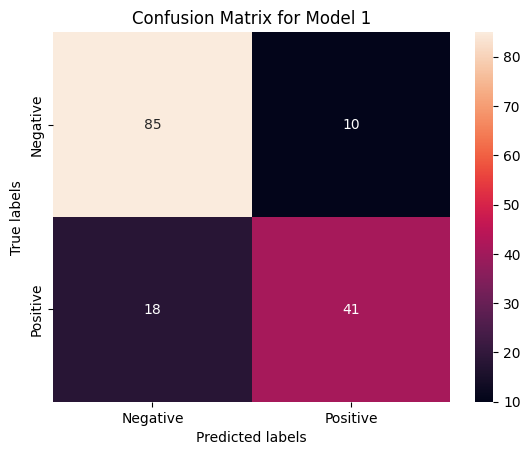

In [193]:
cm = confusion_matrix(y_test, model1.predict(x_test))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Model 1')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()


**Support Vector Machine**

In [194]:
model2 = SVC(C=10, kernel='linear')

In [195]:
model2.fit(x_train, y_train)

SVC(C=10, kernel='linear')

In [196]:
model2.score(x_test,y_test)

0.8181818181818182

In [197]:
print(classification_report(y_test,model2.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        95
           1       0.79      0.71      0.75        59

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



In [198]:
y_pred=model2.predict(x_test)

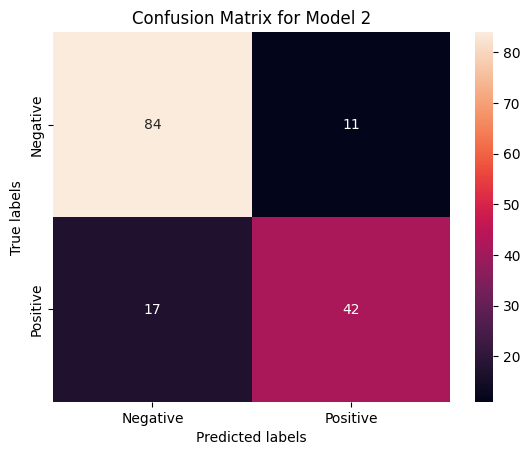

In [199]:
cm = confusion_matrix(y_test, model2.predict(x_test))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Model 2')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

**Train Random Forest Classifier Model**

In [200]:
model3 = RandomForestClassifier(n_estimators=100, max_depth=50,min_samples_split=5)

In [201]:
model3.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5)

In [202]:
model3.score(x_test,y_test)

0.7792207792207793

In [203]:
print(classification_report(y_test,model3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        95
           1       0.72      0.69      0.71        59

    accuracy                           0.78       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [204]:
y_pred= model3.predict(x_test)

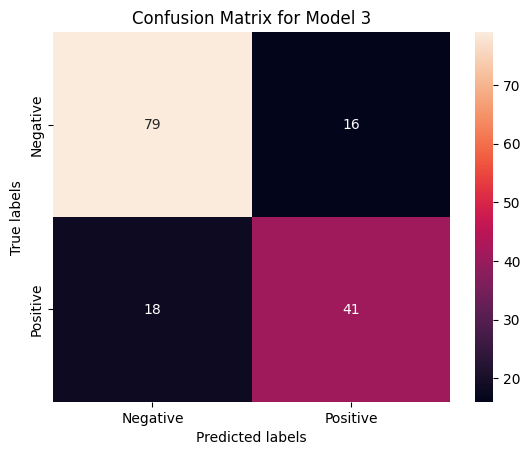

In [205]:
cm = confusion_matrix(y_test, model3.predict(x_test))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Model 3')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

In [206]:
def predict_diabetes(input_data):
  input_data_as_numpy_array = np.asarray(input_data)
  std_data = scale.transform(input_data_as_numpy_array.reshape(1, -1))
  prediction = model3.predict(std_data)[0]
  if prediction == 0:
    return "The Person is Non-Diabetic"
  else:
    return "The Person is Diabetic"

input_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
prediction = predict_diabetes(input_data)
print(prediction)


The Person is Diabetic
